In [ ]:

from google.colab import userdata
import os
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d singhdatascientist/for-image-classification-of-cheetah-vs-hyena

 98% 151M/154M [00:05<00:00, 36.5MB/s]
100% 154M/154M [00:05<00:00, 29.3MB/s]


In [ ]:
!unzip "/content/for-image-classification-of-cheetah-vs-hyena.zip"

Archive:  /content/for-image-classification-of-cheetah-vs-hyena.zip
  inflating: train/cheetah/cheetah_000_resized.jpg  
  inflating: train/cheetah/cheetah_001_resized.jpg  
  inflating: train/cheetah/cheetah_002_resized.jpg  
  inflating: train/cheetah/cheetah_003_resized.jpg  
  inflating: train/cheetah/cheetah_004_resized.jpg  
  inflating: train/cheetah/cheetah_005_resized.jpg  
  inflating: train/cheetah/cheetah_006_resized.jpg  
  inflating: train/cheetah/cheetah_007_resized.jpg  
  inflating: train/cheetah/cheetah_008_resized.jpg  
  inflating: train/cheetah/cheetah_009_resized.jpg  
  inflating: train/cheetah/cheetah_010_resized.jpg  
  inflating: train/cheetah/cheetah_011_resized.jpg  
  inflating: train/cheetah/cheetah_012_resized.jpg  
  inflating: train/cheetah/cheetah_013_resized.jpg  
  inflating: train/cheetah/cheetah_014_resized.jpg  
  inflating: train/cheetah/cheetah_015_resized.jpg  
  inflating: train/cheetah/cheetah_016_resized.jpg  
  inflating: train/cheetah/chee

In [ ]:
import tensorflow as tf
train_dir = '/content/train'
test_dir = '/content/validation'

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224,224),
    batch_size=32,
    label_mode='int'
)

Found 1800 files belonging to 2 classes.


In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224,224),
    batch_size=32,
    label_mode='int'
)

Found 200 files belonging to 2 classes.


In [ ]:
num_classes= 2

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32
)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy:', accuracy)

Found 1800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Epoch 1/5
57/57 [==============================] - 12s 84ms/step - loss: 0.7071 - accuracy: 0.5967 - val_loss: 0.4913 - val_accuracy: 0.7650
Epoch 2/5
57/57 [==============================] - 5s 84ms/step - loss: 0.4574 - accuracy: 0.7872 - val_loss: 0.3477 - val_accuracy: 0.8400
Epoch 3/5
57/57 [==============================] - 4s 69ms/step - loss: 0.3865 - accuracy: 0.8289 - val_loss: 0.3609 - val_accuracy: 0.8300
Epoch 4/5
57/57 [==============================] - 5s 78ms/step - loss: 0.3495 - accuracy: 0.8561 - val_loss: 0.2778 - val_accuracy: 0.9150
Epoch 5/5
7/7 [==============================] - 0s 15ms/step - loss: 0.3040 - accuracy: 0.8600
Test accuracy: 0.8600000143051147


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

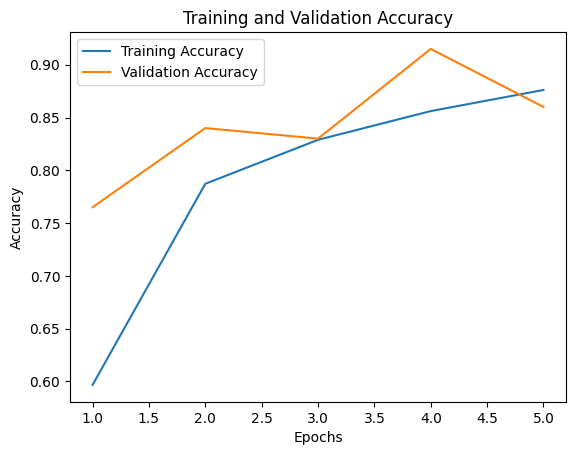

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation accuracy over epochs
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

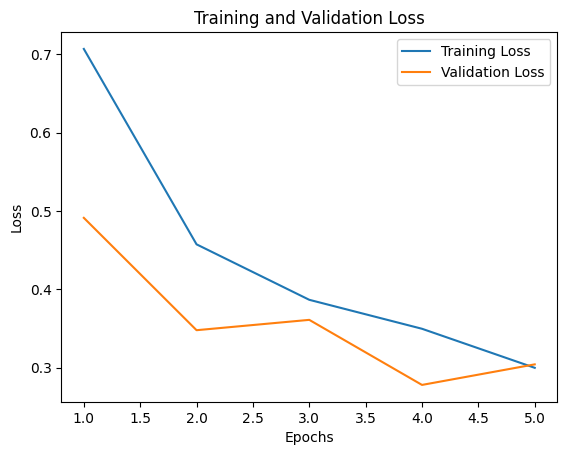

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**ResNet 50**

In [ ]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications import ResNet50

In [ ]:
base_model=ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
base_model.trainable= False

In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.5)(x)
predictions=Dense(2,activation='softmax')(x)

In [ ]:
model=tf.keras.Model(inputs=base_model.input,outputs=predictions)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=2, validation_data=test_dataset)
loss_res, accuracy_res = model.evaluate(test_dataset)

Epoch 1/2
57/57 [==============================] - 15s 153ms/step - loss: 0.1217 - accuracy: 0.9556 - val_loss: 0.0476 - val_accuracy: 0.9950
Epoch 2/2
7/7 [==============================] - 1s 92ms/step - loss: 0.0600 - accuracy: 0.9950


In [ ]:
print('Test Loss:', loss_res)

Test Loss: 0.060032688081264496


In [ ]:
print('Test accuracy:', accuracy_res)

Test accuracy: 0.9950000047683716


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

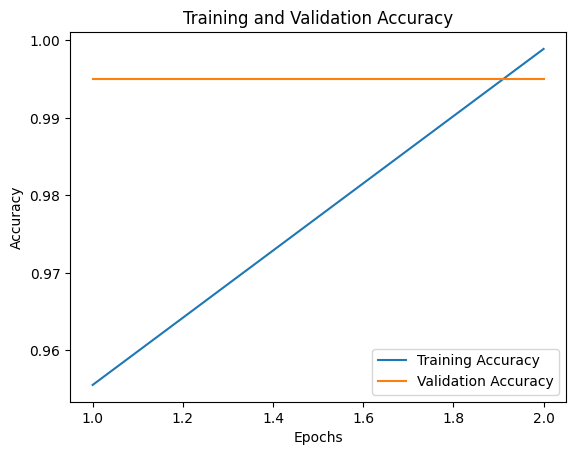

In [ ]:
import matplotlib.pyplot as plt
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

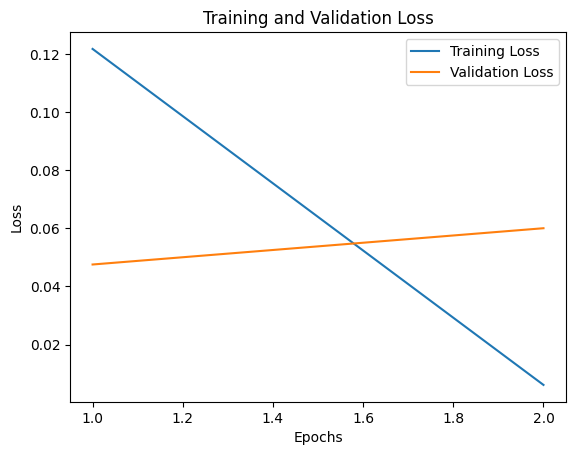

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**VGG Net**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
base_model = VGG16(weights='imagenet', include_top=False)
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)
loss_vgg, accuracy_vgg = model.evaluate(test_dataset)
print('Test loss:', loss_vgg)
print('Test accuracy:', accuracy_vgg)

Epoch 1/5
57/57 [==============================] - 19s 190ms/step - loss: 0.4493 - accuracy: 0.9361 - val_loss: 0.0325 - val_accuracy: 0.9950
Epoch 2/5
57/57 [==============================] - 9s 151ms/step - loss: 0.0640 - accuracy: 0.9850 - val_loss: 0.0244 - val_accuracy: 0.9950
Epoch 3/5
57/57 [==============================] - 9s 145ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.0311 - val_accuracy: 0.9950
Epoch 4/5
57/57 [==============================] - 9s 146ms/step - loss: 0.0355 - accuracy: 0.9922 - val_loss: 0.0232 - val_accuracy: 0.9950
Epoch 5/5
7/7 [==============================] - 1s 114ms/step - loss: 0.0310 - accuracy: 0.9950
Test loss: 0.030950242653489113
Test accuracy: 0.9950000047683716


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

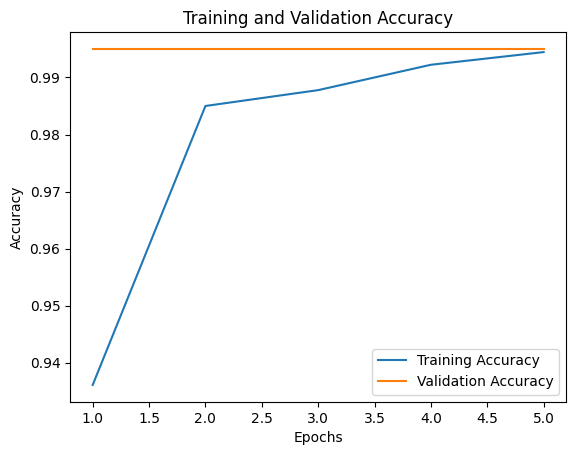

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation accuracy over epochs
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**GOOGLE NET**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout

base_model = InceptionV3(weights='imagenet', include_top=False)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)
loss_goo, accuracy_goo = model.evaluate(test_dataset)
print('Test loss:', loss_goo)
print('Test accuracy:', accuracy_goo)

Epoch 1/5
57/57 [==============================] - 16s 155ms/step - loss: 5.9251 - accuracy: 0.6544 - val_loss: 0.6035 - val_accuracy: 0.6050
Epoch 2/5
57/57 [==============================] - 5s 82ms/step - loss: 0.5645 - accuracy: 0.7156 - val_loss: 0.5266 - val_accuracy: 0.7200
Epoch 3/5
57/57 [==============================] - 6s 92ms/step - loss: 0.5480 - accuracy: 0.7172 - val_loss: 0.4717 - val_accuracy: 0.7750
Epoch 4/5
57/57 [==============================] - 5s 83ms/step - loss: 0.5329 - accuracy: 0.7283 - val_loss: 0.4956 - val_accuracy: 0.7800
Epoch 5/5
7/7 [==============================] - 1s 64ms/step - loss: 0.5258 - accuracy: 0.7250
Test loss: 0.5257818698883057
Test accuracy: 0.7250000238418579


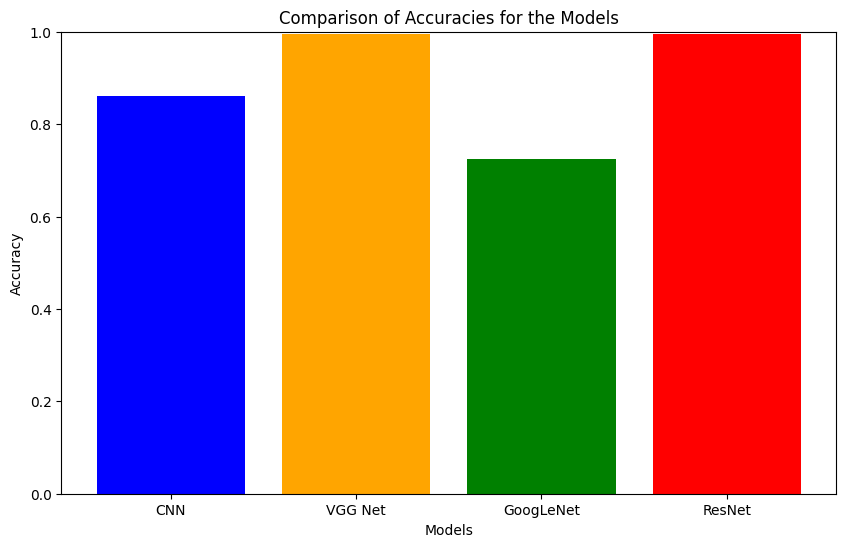

In [ ]:
import matplotlib.pyplot as plt

accuracies = [accuracy, accuracy_vgg, accuracy_goo, accuracy_res]
models = ['CNN', 'VGG Net', 'GoogLeNet', 'ResNet']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])

plt.title('Comparison of Accuracies for the Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

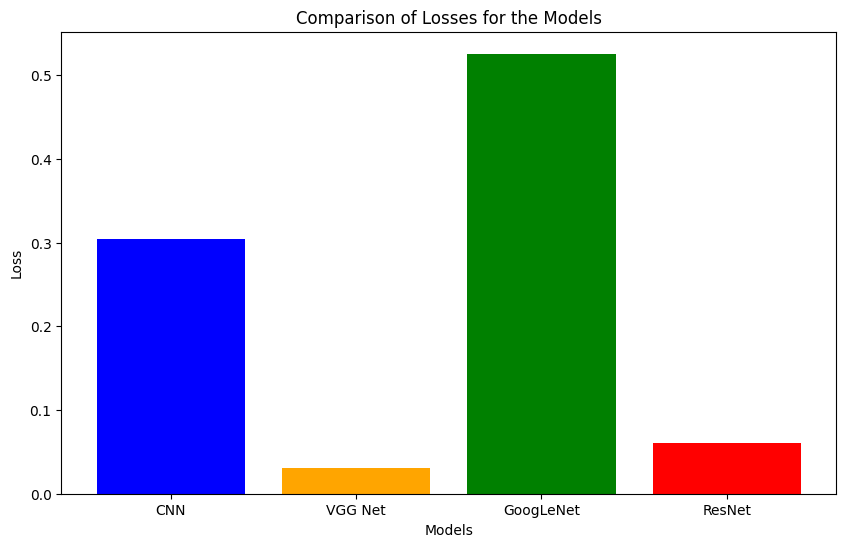

In [ ]:
import matplotlib.pyplot as plt

losses = [loss, loss_vgg, loss_goo, loss_res]
models = ['CNN', 'VGG Net', 'GoogLeNet', 'ResNet']

plt.figure(figsize=(10, 6))
plt.bar(models, losses, color=['blue', 'orange', 'green', 'red'])

plt.title('Comparison of Losses for the Models')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.show()
